### Main libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensemble

Ensemble methods use multiple learning algorithms to obtain a better model than from any constituent learning algorithm alone. Therefore it is used primarily to improve the performance of a model or at least to reduce the likelihood of an unfortunate selection of a model. 

Ensembles combine multiple hypothesis to form a hopefully better hypothesis and is a term usually reserved for methods that generate multiple hypotheses using the same base learner. It can be seen as a way to compensate for poor learning algorithms by performing extra computation, improving overall accuracy for the same increase in computing than would have been improved by increasing resource use for a single method. 

We will evaluate three common types of ensembles: 

*    Adaboost
*    Gradient Boosting
*    Xgboost


## Adaboost

Short for Adaptive Boosting, AdaBoost is likelly the most popular boosting technique and it aims to combine multiple weak classifiers to build a stronger one. 

The thought behind it is that a single classifer might not be able to accurately predict the class of an object (weak classifier), but by grouping multiple weak classifiers - each one progressively learning from the others - it is possible to build a stronger model. 

AdaBoost can be applied on top of any classifier to learn from its shortcomings to build a better model.

To implement AdaBoost using Python, we first need to import the modules. Using the scikit learn library, we import the **AdaBoostClassifier** (**AdaBoostRegressor** is also available but will not be used), the **train_test_split** to split our dataset into training and test sets and **datasets** package from which we will use the [Iris one](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

The Iris dataset will be used as a multi-class classification problem. It contains four features about different types of Iris Flowers.

In [ ]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Based on how the iris dataset is imported, we need to define the X and y of what would be our Dataframe. From what we just explored from the data above, our variable X is the one that contains our features sepal length/width and petal length/width. Therefore, it's **iris.data**.
On the other hand, the variable Y is our target variable - the one we have to predict, which will be either Iris Setosa, Iris Veriscolour or Iris Virginica. Therefore, it's **iris.target**.

In [ ]:
X = iris.data
y = iris.target

We now need to split the data into what will be our training and testing datasets. It is important to later see if our model is classifying the datapoints correctly when we introduce unseen data.

To do so, we use the train_test_split method we first imported. As it is usually defined, we will split the dataset into 70% training and 30% testing. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We can now fit the AdaBoost Model by creating a **A**da**B**oost**C**lassifier object we will name **ABC** and then fitting it to the training set. 

In [ ]:
ABC = AdaBoostClassifier(n_estimators=50, learning_rate=1)

model = ABC.fit(X_train, y_train)

With the model, we can make the predictions and evaluate the accuracy of the model.

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.9555555555555556


## Gradient boosting

Gradient Boosting is another type of Boosting algorithm, which differs from Adaboost in the way the models are trained according to the previous ones.

Instead of establishing weights for the weak classifiers, Gradient Boosting trains new models focusing directly in the error from the previous ones. That means the new models try to predict the error of the previous models instead of regardless predicting the target. In this way, we obtain the final prediction by adding the prediction of all weak classifiers.

The Gradient Boosting algorithm works like this: 

1.   The first model makes a very simple approximation of the prediction, and the residual errors are obtained;

2.   Then, more models are trained on these residual errors to try to predict the error of the first model. In this way, when the predictions of each model are added together to obtain the final prediction, a more corrected version of the first prediction is obtained;

3.   Finally, this process is repeated for several iterations, obtaining smaller and smaller residual errors.

Now that we know what a Gradient Boosting algorithm is, let's take this exemple below to see how it works in practice.

### Importing the Dataset

For this exemple we're gonna use the Boston Housing dataset. This is a simple dataset with data about houses in the Boston area.

Its goal is to predict the price of a house - in thousands of dollars - based on some features such as crime rates, number of bedrooms, proximity to industrial centers, etc.

With the comands below this dataset was imported from the sklearn.datasets library:

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

### Setting the Dataframe

First of all, let's declare our dataframe as 'df' and print the first five rows to check how the data looks like:

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now, let's declare the 'target' which is the class we want to predict, in orther words, the price, in thousands of dollars, of the houses:

In [ ]:
target = df.pop('target')

### Splitting the Data

An important step in every machine learning predict system is to split the data into two datasets, a train one and a test one.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size = 0.8, test_size = 0.2, random_state = 0)

In this exemple we used 80% of the data for the train dataset and 20% for the test dataset.

### Importing and Creating the Model

After we splited the data, we need to import and set the machine learning model.

In the codeline below the Gradient Boosting Regressor model is imported from the sklearn.ensemble library:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Now we have to creat the regressor based on our goals.

To do so, we need to set the model and choose its hyperparameters which are the number of estimators, the learning rate and the depth of each decision tree used as weak classifier in this method.

These values change a lot according to the goal of the project, so you should run some tests changing theses parameters to check what works better for your purpose.

In our exemple we gonna use a Gradient Boosting Regressor with 100 decision trees with 3 degrees of depth:

In [ ]:
gradr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

### Training the Model

In this step, 80% of the data is used to train the Gradient Boosting Regressor so it would be able to make some predictions on the other 20% of the data.

In [ ]:
gradr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Evaluating the Model

Since we have already trained our model, the next step would be avaluating it.

A good way to do that is to check the medium error of the model in the test dataset.

To do so, we imported a function of cross validation that will allow us to get this error:

In [ ]:
from sklearn.model_selection import cross_val_score
score = -1*cross_val_score(gradr, X_test, y_test, cv = 10, scoring = 'neg_mean_absolute_error').mean()
score

3.062012848541953

### Comparring the Predictions with the Real Price

Finally, we get to the point to see the predictions.

In the comands below we generate the predictions and then we creat a dataframe to compare the real value with the predicted one.

In [ ]:
gradr_preds = gradr.predict(X_test)

gradr_comparison = pd.DataFrame()
gradr_comparison['Real Value'] = y_test
gradr_comparison['Prediction'] = gradr_preds

gradr_comparison

,Real Value,Prediction
329,22.6,24.509386
371,50.0,31.991749
219,23.0,23.695919
403,8.3,10.670755
78,21.2,22.330107
...,...,...
56,24.7,23.427996
455,14.1,14.781532
60,18.7,18.574645
213,28.1,24.631278


## XGBoost

The name XGBoost means e**X**treme **G**radient **B**oosting. It is an open source software library for machine learning monitored with the so-called gradient tree algorithm. With the help of XGBoost, target variables can be more precisely determined by combining several simpler and weaker models and making estimates. The algorithm addresses machine learning problems in the areas of regression and classification, for example. To see how it works, we are gonna make a tutorial with a wine dataset from sklearn. A classification problem. 

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
data = pd.DataFrame(wine.data)
data.columns = wine.feature_names
data.head(3)
data['class'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


The wine dataset presents multiples features in order to classfie the type of wine (class column, our target). There are three differents class types (0, 1 and 2), as we can see below: 

In [ ]:
data['class'].unique()

array([0, 1, 2])

Similar to the split process used at Adaboost method, we will also separate the database into the variables X and y, since X are the features of the dataset and y is the target (which we have to predict based on features - X) variable (class of wine). 

Here we also split the data into training and testing datasets. We will split the dataset into 70% training and 30% testing. 

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X, y = data.iloc[:,:-1], data.iloc[:,-1]

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)



We can now fit the XGBoost Model by creating a XGBoost Classifier object that we will name **XG** and then fitting it to the training set. 

In [ ]:
XG = xgb.XGBClassifier(objective ='reg:linear', n_estimators = 50)

XG.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

With the model, we can make the predictions and evaluate the accuracy metric for it:

In [ ]:
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))


Accuracy =  0.9814814814814815


There are two things which are interesting to analyze and to visualize when we are talking about XGBoost and, consequently, trees: **Boosting Trees** and **Feature Importance**. 

### Boosting Trees

XGBoost has a plot_tree() function that allows you to view individual trees from the fully optimized model that XGBoost creates using the entire wine data set. After training a model, you can pass the plot_tree() function along with the number of trees you want to plot using the num_trees argument. First of all, we have to create a DMatrix, which is internal data structure that is used by XGBoost, optimized for both memory efficiency and training speed. Example: 

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

Once the DMatrix is created, we can see the trees that the XGBoost algorithm used to classfie the Wine class of our dataset and which features were used firstly:

[22:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


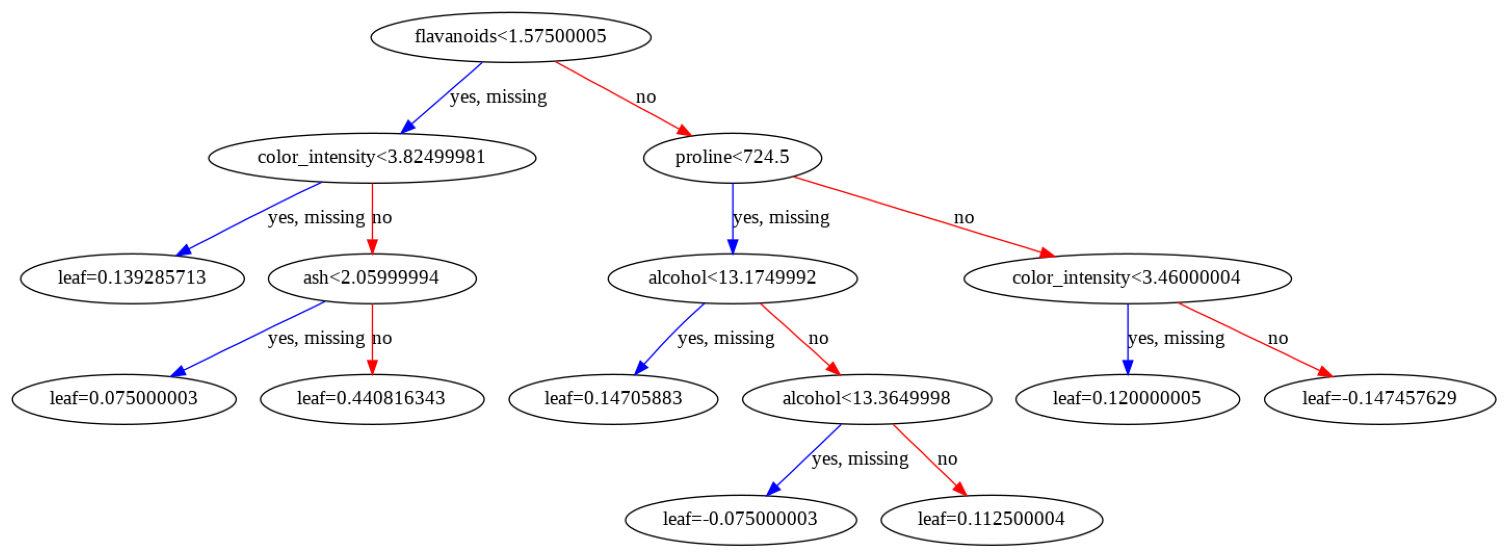

In [ ]:
import matplotlib.pyplot as plt

params = {"objective":"reg:linear"}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=100)


xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [60, 10]
plt.show()

Note that the score you see in the leaves are not probability. They are the regression values. It can be converted to a probability score by using the logistic function, but it is not the point here. Basically, after this values be converted to a probability, it shows the chances of that node belongs to the first, second or third wine class. These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions. 

### Feature importance

Another interesting analysis to be performed on XGBoost models is to examine the importance of each column in the original dataset. An effective way to do this analysis is to count the number of times each column is divided into all rounds of tree growth on a bar graph. XGBoost has an implemented function (plot_importance ()) that allows this view.

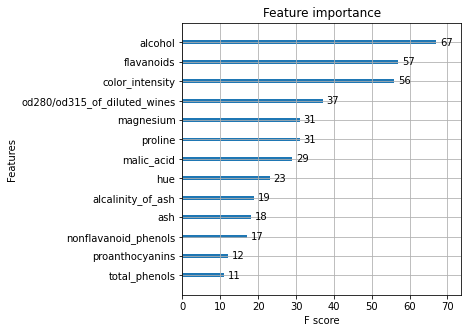

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()